In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
dataset=pd.read_csv("/proc_data.csv")

In [3]:
df=dataset.sample(1000)

In [4]:
df.head()

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
33305,41771,0,39.0,2,112985.56,9176.463333,4.0,4.0,15.0,2.000000,4871,18,15.000000,1935,7.0,2,1050.97,41.033424,0,2,98.832611,10000.000000,3,717.441866,1
68832,86252,7,22.0,5,128163.36,10648.280000,5.0,7.0,7.0,4.000000,4068,14,0.000000,4110,5.0,1,1494.56,30.911401,222,1,281.792301,516.037956,3,536.997743,0
26426,33130,6,25.0,9,73938.68,6438.556667,4.0,6.0,16.0,2.000000,5588,6,30.923342,1866,7.0,2,2596.08,35.924528,142,2,67.301385,257.179520,4,599.374762,1
12964,16209,2,42.0,9,129680.28,10643.690000,8.0,3.0,5.0,2.000000,3455,27,18.000000,1714,2.0,2,240.27,39.075570,242,2,114.165609,476.870545,4,753.332845,1
7496,9395,0,36.0,6,31911.34,2424.278333,1.0,4.0,4.0,3.539302,4077,12,30.923342,3832,3.0,1,737.96,24.287545,356,1,53.711045,194.332622,5,284.384166,1


## Creating a Neural Network with One Hidden Layer on original dataset




Accuracy: 0.6


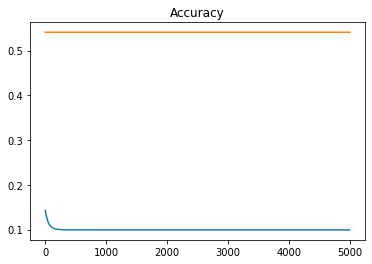

In [5]:
# Load dataset
data = df

# Get features and target
X=df.drop("Credit_Score", axis=1)
y=df.Credit_Score

# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# Initialize variables
learning_rate = 0.5
iterations = 5000
N = y_train.size

# number of input features
input_size = 24

# number of hidden layers neurons
hidden_size = 1

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
    
results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")

# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

## Applying PCA on dataset with N Components = 2

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop("Credit_Score", axis=1))

scaled_data=scaler.transform(df.drop("Credit_Score", axis=1))
scaled_data.shape

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

x_pca=pca.transform(scaled_data)

In [6]:
scaled_data.shape

(1000, 24)

In [7]:
x_pca.shape


(1000, 2)

## Creating a Neural Network with One Hidden Layer on standardized dataset with PCA = 2


Accuracy: 0.6


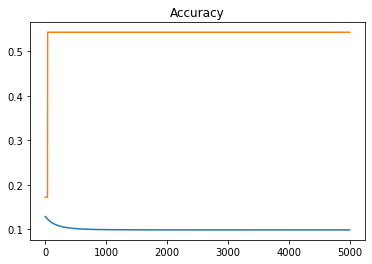

In [9]:
# Load dataset
data = df

# Get features and target
X= x_pca
y=df.Credit_Score

# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# Initialize variables
learning_rate = 0.5
iterations = 5000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 1

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])

# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update
    
results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")

# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

### Creating a Neural Network with One Hidden Layer on standardized dataset with PCA = 2 : Multi-class Classification

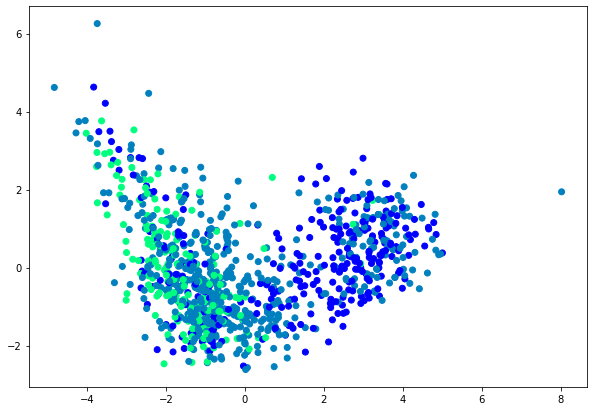

In [8]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Class=pd.DataFrame(df.Credit_Score).to_numpy()

np.random.seed(0)
feature_set =  x_pca
labels = Class
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

In [9]:
labels.shape

(1000, 1)

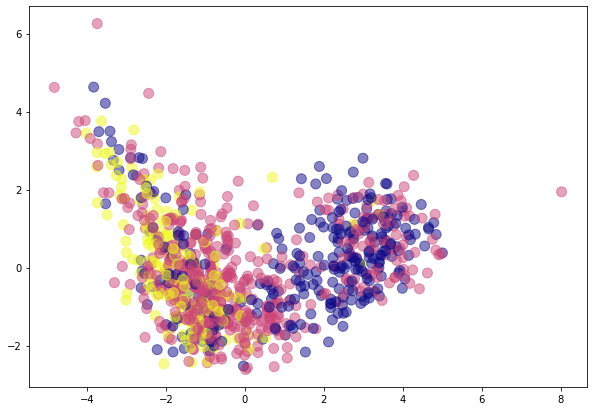

Loss function value:  1208.238767947495
Loss function value:  853.4486250646517
Loss function value:  847.9783535030655
Loss function value:  846.5710285353618
Loss function value:  846.0597043379537
Loss function value:  845.8312937998378
Loss function value:  845.7075594135596
Loss function value:  845.6236745010199
Loss function value:  845.5525944728148
Loss function value:  845.4808743331962


In [15]:
# labels = labels.reshape(1000, 1)

one_hot_labels = np.zeros((1000, 3))

for i in range(1000):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 2
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(2000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)

## Applying Support Vector Machine (SVM) on standardized dataset with PCA = 2

In [17]:
from sklearn.model_selection import train_test_split

# Get features and target
X= x_pca
y=df.Credit_Score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state=4)

In [18]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

y_predModel1 = model1.predict(x_test)
y_predModel2 = model2.predict(x_test)
y_predModel3 = model3.predict(x_test)
y_predModel4 = model4.predict(x_test)

print("Accuracy of the Model 1: {0}%".format(accuracy_score(y_test, y_predModel1)*100))
print("Accuracy of the Model 2: {0}%".format(accuracy_score(y_test, y_predModel2)*100))
print("Accuracy of the Model 3: {0}%".format(accuracy_score(y_test, y_predModel3)*100))
print("Accuracy of the Model 4: {0}%".format(accuracy_score(y_test, y_predModel4)*100))

Accuracy of the Model 1: 70.0%
Accuracy of the Model 2: 70.0%
Accuracy of the Model 3: 60.0%
Accuracy of the Model 4: 60.0%
